In [50]:
import os
import shutil
import pandas as pd
import numpy
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

In [2]:
os.getcwd()

'C:\\Users\\SABYA\\Aritar01\\CAP_106\\CAP_106_Research_Env'

In [26]:
df = pd.read_excel("C:/Users/SABYA/Aritar01/CAP_106/Raw_Data/BA_106.xlsx")

In [27]:
# separate date column
date = df['Date']
# drop date
df1 = df.drop(labels=["Date"], axis=1)

In [28]:
# converting object dtype into float
df2 = df1.astype('float')

In [29]:
# concat date and df2
df3 = pd.concat([date, df2], axis=1)

In [30]:
# columns to keep
ls = [
    'Date',
 'RUN Duration, hours',
 'RUN No.',
 'NpahthaFeedCoil1',
 'NpahthaFeedCoil2',
 'NpahthaFeedCoil3',
 'NpahthaFeedCoil4',
 'NpahthaFeedCoil5',
 'NpahthaFeedCoil6',
 'DS RateCoil1',
 'DS RateCoil2',
 'DS RateCoil3',
 'DS RateCoil4',
 'DS RateCoil5',
 'DS RateCoil6',
 'COT1',
 'COT2',
 'COT3',
 'COT4',
 'COT5',
 'COT6',
 'CIP1',
 'CIP2',
 'CIP3',
 'CIP4',
 'CIP5',
 'CIP6',
 'Wall_Fuel_Gas_Flow',
 'Ground_Fuel_Gas_Flow',
 'O2',
 'CrossOverTemp_Coil1',
 'CrossOverTemp_Coil2',
 'CrossOverTemp_Coil3',
 'CrossOverTemp_Coil4',
 'CrossOverTemp_Coil5',
 'CrossOverTemp_Coil6'
]
df4 = df3[ls]

In [31]:
# calulate mean, max and average of individual colis
total_naphtha_feed = df4[['NpahthaFeedCoil1',
 'NpahthaFeedCoil2',
 'NpahthaFeedCoil3',
 'NpahthaFeedCoil4',
 'NpahthaFeedCoil5',
 'NpahthaFeedCoil6']].sum(axis=1)
total_ds_rate = df4[['DS RateCoil1',
 'DS RateCoil2',
 'DS RateCoil3',
 'DS RateCoil4',
 'DS RateCoil5',
 'DS RateCoil6']].sum(axis=1)
avg_cot = df4[['COT1',
 'COT2',
 'COT3',
 'COT4',
 'COT5',
 'COT6']].mean(axis=1)
max_cip = df4[['CIP1',
 'CIP2',
 'CIP3',
 'CIP4',
 'CIP5',
 'CIP6'
 ]].max(axis=1)
avg_cross_over_temp = df4[['CrossOverTemp_Coil1',
 'CrossOverTemp_Coil2',
 'CrossOverTemp_Coil3',
 'CrossOverTemp_Coil4',
 'CrossOverTemp_Coil5',
 'CrossOverTemp_Coil6']].mean(axis=1)

ds_ratio_coil1 = df4["DS RateCoil1"] / df4["NpahthaFeedCoil1"]
ds_ratio_coil2 = df4["DS RateCoil2"] / df4["NpahthaFeedCoil2"]
ds_ratio_coil3 = df4["DS RateCoil3"] / df4["NpahthaFeedCoil3"]
ds_ratio_coil4 = df4["DS RateCoil4"] / df4["NpahthaFeedCoil4"]
ds_ratio_coil5 = df4["DS RateCoil5"] / df4["NpahthaFeedCoil5"]
ds_ratio_coil6 = df4["DS RateCoil6"] / df4["NpahthaFeedCoil6"]

total_ds_ratio = total_ds_rate / total_naphtha_feed

In [32]:
df4["DSRatioCoil1"] = ds_ratio_coil1
df4["DSRatioCoil2"] = ds_ratio_coil2
df4["DSRatioCoil3"] = ds_ratio_coil3
df4["DSRatioCoil4"] = ds_ratio_coil4
df4["DSRatioCoil5"] = ds_ratio_coil5
df4["DSRatioCoil6"] = ds_ratio_coil6
df4["Total_Naphtha_Feed"] = total_naphtha_feed
df4["Total_DS_Rate"] = total_ds_rate
df4["Total_Ds_Ratio"] = total_ds_ratio
df4["Avg_COT"] = avg_cot
df4["Avg_CIT"] = avg_cross_over_temp
df4["Max_CIP"] = max_cip

C:\Users\SABYA\Aritar01\CAP_106\cap_106_env\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\SABYA\Aritar01\CAP_106\cap_106_env\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\SABYA\Aritar01\CAP_106\cap_106_env\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

In [34]:
# Read the additional data
df5 = pd.read_excel("C:/Users/SABYA/Aritar01/CAP_106/Raw_Data/Additional_BA_106.xlsx")

In [36]:
# separate the date column from df8
date1 = df5['Date']

In [37]:
# create a date range list for the date column
date1_df = pd.DataFrame(pd.date_range(list(df5['Date'])[0], periods=df5.shape[0], freq='1h'), columns=['Date'])

In [39]:
# drop the date column from df8
df6 = df5.drop(labels=['Date'], axis=1)

In [41]:
# concat the above created date1_df with df9
df7 = pd.concat([date1_df, df6], axis=1)

In [42]:
# merge df7 and df10 on date column to get the final dataframe
df_final = pd.merge(df7, df4, on='Date').reset_index(drop=True)

In [43]:
df_final

,Date,BFW Rate,DS Temp,Feed Temp1,Feed Temp2,"RUN Duration, hours",RUN No.,NpahthaFeedCoil1,NpahthaFeedCoil2,NpahthaFeedCoil3,...,DSRatioCoil3,DSRatioCoil4,DSRatioCoil5,DSRatioCoil6,Total_Naphtha_Feed,Total_DS_Rate,Total_Ds_Ratio,Avg_COT,Avg_CIT,Max_CIP
0,2021-01-06 12:00:00,1.178144e-16,272.063493,56.937054,79.477049,0.0,1.0,3.354033,3.354033,3.704495,...,1.024107,1.162284,1.146217,1.135841,20.328890,22.765335,1.119851,799.052065,636.092415,1.032023
1,2021-01-06 13:00:00,1.178144e-16,267.207402,53.334087,82.662585,0.1,1.0,5.958931,5.958931,5.961114,...,0.570074,0.587435,0.619911,0.599319,34.814463,20.387922,0.585616,813.219097,607.738848,1.297556
2,2021-01-06 14:00:00,1.178144e-16,252.592778,52.641992,82.256563,0.2,1.0,5.946847,5.946847,5.937142,...,0.555818,0.571895,0.603600,0.576797,34.788479,19.799491,0.569139,815.159549,611.176134,1.227717
3,2021-01-06 15:00:00,1.178144e-16,253.567194,52.250743,82.205379,0.3,1.0,6.303030,6.303030,6.286914,...,0.524805,0.545877,0.569213,0.544848,36.790470,19.797455,0.538114,814.833182,603.644576,1.293669
4,2021-01-06 16:00:00,1.178144e-16,251.107256,51.066879,82.019186,0.4,1.0,6.582793,6.582793,6.565398,...,0.505327,0.524183,0.543613,0.525574,38.383156,19.921127,0.519007,814.705149,597.125078,1.181593
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11548,2022-05-02 16:00:00,1.057348e+00,232.965838,49.239505,51.584862,59.4,15.0,5.709997,5.709997,5.814525,...,0.600182,0.597151,0.586425,0.592280,34.921922,20.939064,0.599597,817.960936,639.801104,1.469659
11549,2022-05-02 17:00:00,1.378470e+01,232.283094,49.063456,51.495196,59.5,15.0,5.709468,5.709468,5.810093,...,0.600682,0.597686,0.586297,0.590679,34.930163,20.940725,0.599503,818.299786,640.889692,1.472635
11550,2022-05-02 18:00:00,1.380737e+01,231.988511,49.614569,51.453325,59.6,15.0,5.759999,5.759999,5.866227,...,0.594877,0.592292,0.583172,0.590729,35.170096,20.938667,0.595354,817.913417,638.380010,1.469588
11551,2022-05-02 19:00:00,1.384509e+01,232.458175,49.715542,51.378495,59.7,15.0,5.802558,5.802558,5.914639,...,0.590066,0.587393,0.578216,0.588331,35.429867,20.940745,0.591048,818.189503,637.892354,1.472233


In [44]:
df_final.columns

Index(['Date', 'BFW Rate', 'DS Temp', 'Feed Temp1', 'Feed Temp2',
       'RUN Duration, hours', 'RUN No.', 'NpahthaFeedCoil1',
       'NpahthaFeedCoil2', 'NpahthaFeedCoil3', 'NpahthaFeedCoil4',
       'NpahthaFeedCoil5', 'NpahthaFeedCoil6', 'DS RateCoil1', 'DS RateCoil2',
       'DS RateCoil3', 'DS RateCoil4', 'DS RateCoil5', 'DS RateCoil6', 'COT1',
       'COT2', 'COT3', 'COT4', 'COT5', 'COT6', 'CIP1', 'CIP2', 'CIP3', 'CIP4',
       'CIP5', 'CIP6', 'Wall_Fuel_Gas_Flow', 'Ground_Fuel_Gas_Flow', 'O2',
       'CrossOverTemp_Coil1', 'CrossOverTemp_Coil2', 'CrossOverTemp_Coil3',
       'CrossOverTemp_Coil4', 'CrossOverTemp_Coil5', 'CrossOverTemp_Coil6',
       'DSRatioCoil1', 'DSRatioCoil2', 'DSRatioCoil3', 'DSRatioCoil4',
       'DSRatioCoil5', 'DSRatioCoil6', 'Total_Naphtha_Feed', 'Total_DS_Rate',
       'Total_Ds_Ratio', 'Avg_COT', 'Avg_CIT', 'Max_CIP'],
      dtype='object')

In [46]:
# correlation analysis for Naphtha Feed
df_naphtha_feed = df_final[['NpahthaFeedCoil1',
                        'NpahthaFeedCoil2', 
                        'NpahthaFeedCoil3',
                        'NpahthaFeedCoil4',
                        'NpahthaFeedCoil5', 
                        'NpahthaFeedCoil6',
                        'Total_Naphtha_Feed']]

In [49]:
corr_mat_1 = df_naphtha_feed.corr()

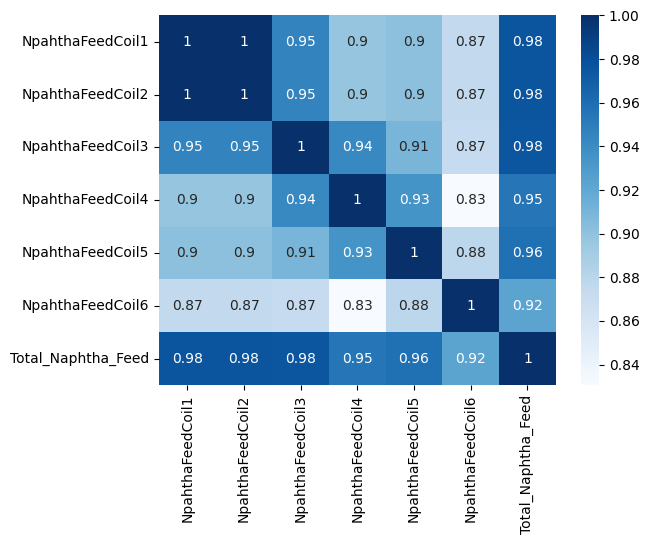

In [53]:
# plotting correlation heatmap for Faphtha Feed
dataplot = sb.heatmap(corr_mat_1, cmap="Blues", annot=True)
  
# displaying heatmap
plt.show()

# save the plot as 